In [1]:
import pennylane as qml
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
import networkx as nx

np.random.seed(722)

# Define the molecule
# N = 3

In [2]:
# symbols  = ['H'] * N
# geometry = np.array([[0.01076341,  0.04449877,  0.0],
#                      [0.98729513,  1.63059094,  0.0],
#                      [1.87262415, -0.00815842,  0.0]], requires_grad = False)

# geometry = np.random.rand(N, 3, requires_grad = False)
electrons = 2
charge = 1

# Build the electronic Hamiltonian
# H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry, charge=charge)
H = qml.PauliZ(0)
qubits = 8

# Define the HF state
hf_state = qml.qchem.hf_state(electrons, qubits)

# Generate single and double excitations
singles, doubles = qml.qchem.excitations(electrons, qubits)

# Map excitations to the wires the UCCSD circuit will act on
s_wires, d_wires = qml.qchem.excitations_to_wires(singles, doubles)

# Define the device
dev = qml.device("qiskit.aer", wires=qubits)


# Define the qnode
@qml.qnode(dev)
def circuit(params, wires, s_wires, d_wires, hf_state):
    qml.UCCSD(params, wires, s_wires, d_wires, hf_state)
    return qml.expval(H)

# Define the initial values of the circuit parameters
params = np.zeros(len(singles) + len(doubles))

In [3]:
circuit(
    params,
    wires=range(qubits),
    s_wires=s_wires,
    d_wires=d_wires,
    hf_state=hf_state
)

array(-1.)

(<Figure size 1900x900 with 1 Axes>, <Axes: >)

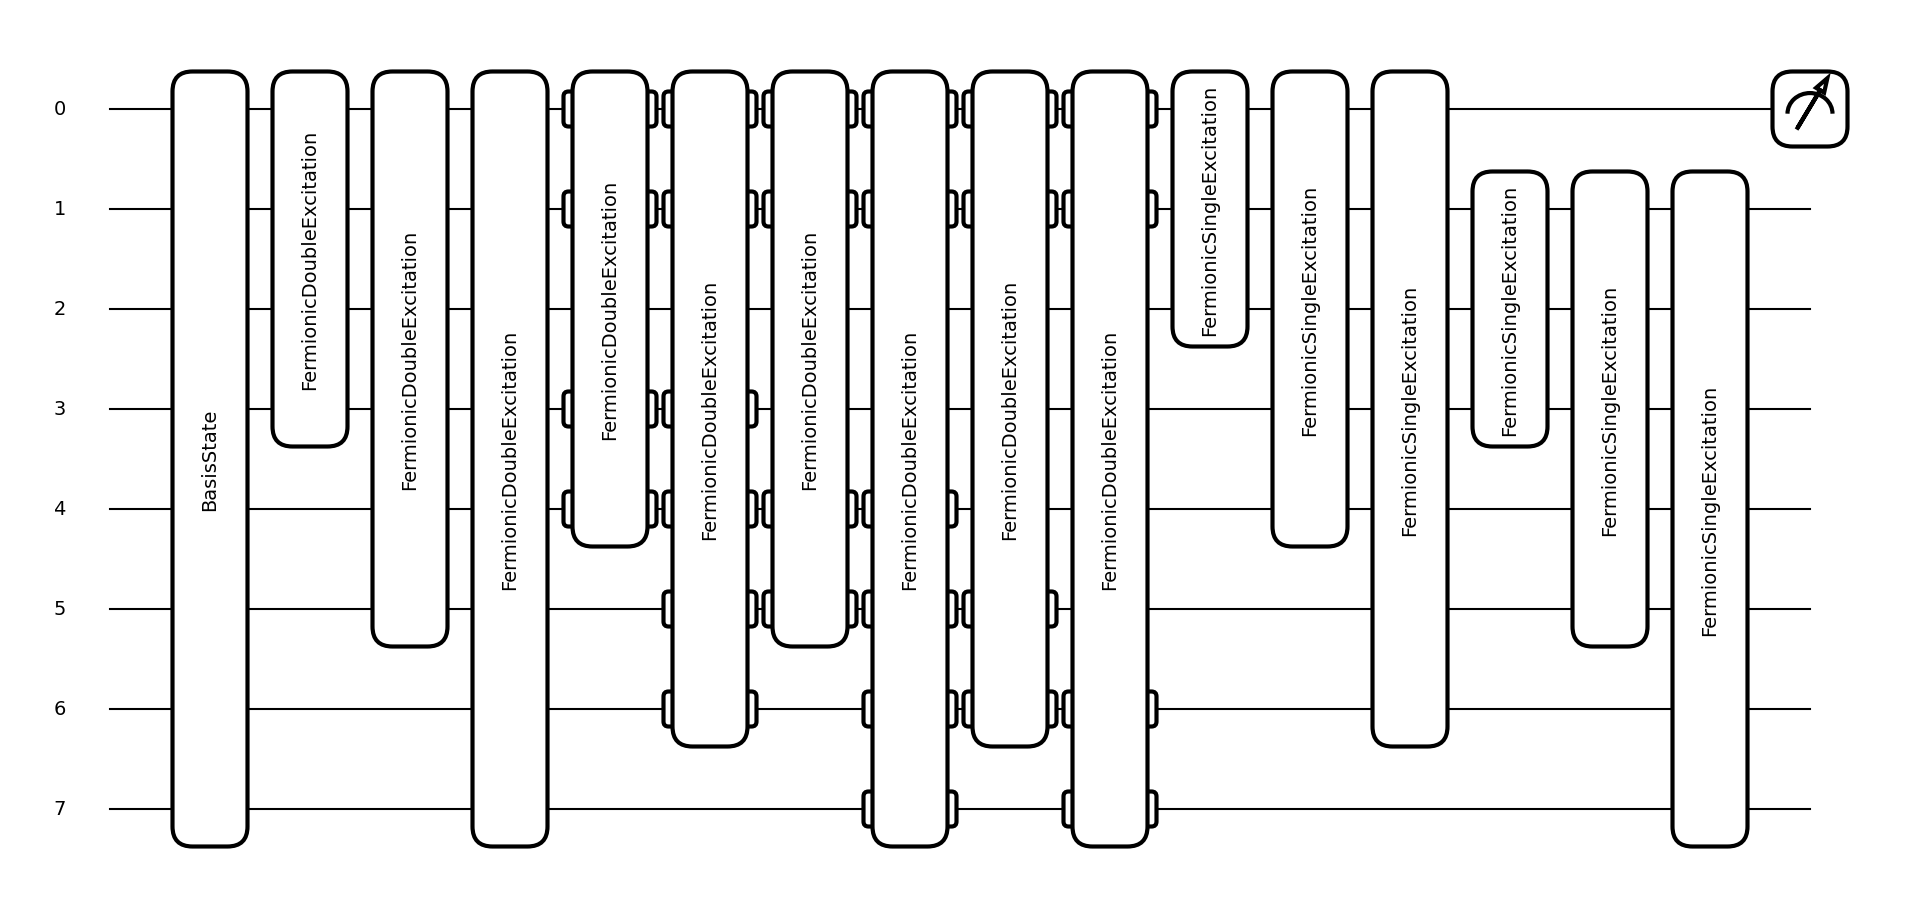

In [4]:
qml.draw_mpl(circuit)(params, wires=range(qubits), s_wires=s_wires, d_wires=d_wires, hf_state=hf_state)

In [5]:
QuantumCircuit.count_ops(dev._circuit)

OrderedDict([('cx', 688),
             ('h', 312),
             ('rx', 312),
             ('rz', 84),
             ('measure', 8),
             ('x', 2)])

In [6]:
# print the number of total gates

print("Total number of gates: ", sum(QuantumCircuit.count_ops(dev._circuit).values()))

Total number of gates:  1406


In [7]:
# print the number of two qubit gates, i.e. cx gates

print("Number of two qubit gates: ", QuantumCircuit.count_ops(dev._circuit)['cx'])

Number of two qubit gates:  688


In [8]:
dev._circuit.qasm(formatted=True, filename="./raw_qasm/vqe_n{}_from_python.qasm".format(qubits))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
creg c[8];
x q[0];
x q[1];
h q[0];
h q[1];
rx(-pi/2) q[2];
h q[3];
cx q[0],q[1];
cx q[1],q[2];
cx q[2],q[3];
rz(0) q[3];
cx q[2],q[3];
cx q[1],q[2];
cx q[0],q[1];
h q[0];
h q[1];
rx(pi/2) q[2];
h q[3];
rx(-pi/2) q[0];
h q[1];
rx(-pi/2) q[2];
rx(-pi/2) q[3];
cx q[0],q[1];
cx q[1],q[2];
cx q[2],q[3];
rz(0) q[3];
cx q[2],q[3];
cx q[1],q[2];
cx q[0],q[1];
rx(pi/2) q[0];
h q[1];
rx(pi/2) q[2];
rx(pi/2) q[3];
h q[0];
rx(-pi/2) q[1];
rx(-pi/2) q[2];
rx(-pi/2) q[3];
cx q[0],q[1];
cx q[1],q[2];
cx q[2],q[3];
rz(0) q[3];
cx q[2],q[3];
cx q[1],q[2];
cx q[0],q[1];
h q[0];
rx(pi/2) q[1];
rx(pi/2) q[2];
rx(pi/2) q[3];
h q[0];
h q[1];
h q[2];
rx(-pi/2) q[3];
cx q[0],q[1];
cx q[1],q[2];
cx q[2],q[3];
rz(0) q[3];
cx q[2],q[3];
cx q[1],q[2];
cx q[0],q[1];
h q[0];
h q[1];
h q[2];
rx(pi/2) q[3];
rx(-pi/2) q[0];
h q[1];
h q[2];
h q[3];
cx q[0],q[1];
cx q[1],q[2];
cx q[2],q[3];
rz(0) q[3];
cx q[2],q[3];
cx q[1],q[2];
cx q[0],q[1];
rx(pi/2) q[0];
h q[1];
h q[2];